In [71]:
import pandas as pd

In [72]:
def percent_missing_func(df_input):
    percent_missing = df_input.isnull().sum() * 100 / len(df_input)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
    return missing_value_df

# Дані по продажам відеоігор

In [73]:
score_count_df = pd.read_csv("datasets/vgsales-4.csv")
score_count_df['prefix_l'] = score_count_df['Name'].str.slice(0, 12).str.lower()
score_count_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,prefix_l
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E,wii sports
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,super mario
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E,mario kart w
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E,wii sports r
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,pokemon red/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01,64.0,7.0,NaN,NaN,E,nancy drew:
17412,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,fashion desi
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002.0,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,ashita no jo
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009.0,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,nadepro!! ki


# Список часток відсутніх записів для кожної ознаки

In [74]:
percent_missing_func(score_count_df)

,percent_missing
Name,0.000000
Platform,0.000000
Year_of_Release,0.045935
Genre,0.000000
Publisher,0.005742
NA_Sales,0.000000
EU_Sales,0.000000
JP_Sales,0.000000
Other_Sales,0.000000
Global_Sales,0.000000


# Найбільші продажі відеоігор по рокам

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '1976.0'),
  Text(1, 0, '1977.0'),
  Text(2, 0, '1978.0'),
  Text(3, 0, '1979.0'),
  Text(4, 0, '1980.0'),
  Text(5, 0, '1981.0'),
  Text(6, 0, '1982.0'),
  Text(7, 0, '1983.0'),
  Text(8, 0, '1984.0'),
  Text(9, 0, '1985.0'),
  Text(10, 0, '1986.0'),
  Text(11, 0, '1987.0'),
  Text(12, 0, '1988.0'),
  Text(13, 0, '1989.0'),
  Text(14, 0, '1990.0'),
  Text(15, 0, '1991.0'),
  Text(16, 0, '1992.0'),
  Text(17, 0, '1993.0'),
  Text(18, 0, '1994.0'),
  Text(19, 0, '1995.0'),
  Text(20, 0, '1996.0'),
  Text(21, 0, '1997.0'),
  Text(22, 0, '1998.0'),
  Text(23, 0, '1999.0'),
  Text(24, 0, '2000.0'),
  Text(25, 0, '2001.0'),
  Text(26, 0, '2002.0'),
  Text(27, 0, '2003.0'),
  Text(28, 0, '2004.0'),
  Text(29, 0, '2005.0'),
  Text(30, 0, '2006.0'),
  Text(31, 0, '2007.0'),
  Text(32, 0, '2

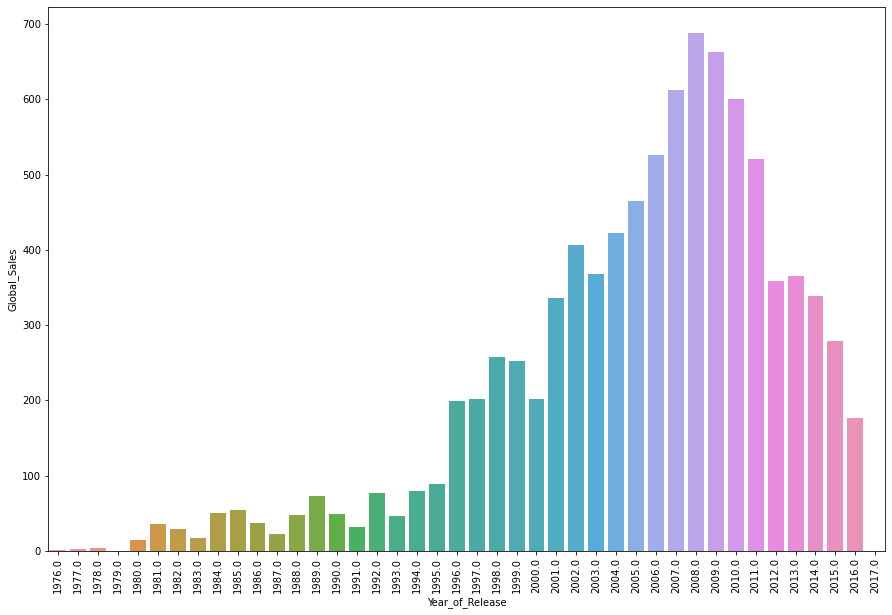

In [75]:
import seaborn as sns
from matplotlib import pyplot as plt

most_sales_year = score_count_df.groupby(by=['Year_of_Release'])['Global_Sales'].sum()
most_sales_year = most_sales_year.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x="Year_of_Release", y="Global_Sales", data=most_sales_year)
plt.xticks(rotation=90)

# Кількість випущених ігор по рокам

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '1976.0'),
  Text(1, 0, '1979.0'),
  Text(2, 0, '1977.0'),
  Text(3, 0, '1978.0'),
  Text(4, 0, '2017.0'),
  Text(5, 0, '1984.0'),
  Text(6, 0, '1985.0'),
  Text(7, 0, '1980.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1987.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1989.0'),
  Text(12, 0, '1983.0'),
  Text(13, 0, '1986.0'),
  Text(14, 0, '1982.0'),
  Text(15, 0, '1991.0'),
  Text(16, 0, '1992.0'),
  Text(17, 0, '1981.0'),
  Text(18, 0, '1993.0'),
  Text(19, 0, '1994.0'),
  Text(20, 0, '1995.0'),
  Text(21, 0, '1996.0'),
  Text(22, 0, '1997.0'),
  Text(23, 0, '1999.0'),
  Text(24, 0, '2000.0'),
  Text(25, 0, '1998.0'),
  Text(26, 0, '2001.0'),
  Text(27, 0, '2013.0'),
  Text(28, 0, '2016.0'),
  Text(29, 0, '2014.0'),
  Text(30, 0, '2015.0'),
  Text(31, 0, '2012.0'),
  Text(32, 0, '2

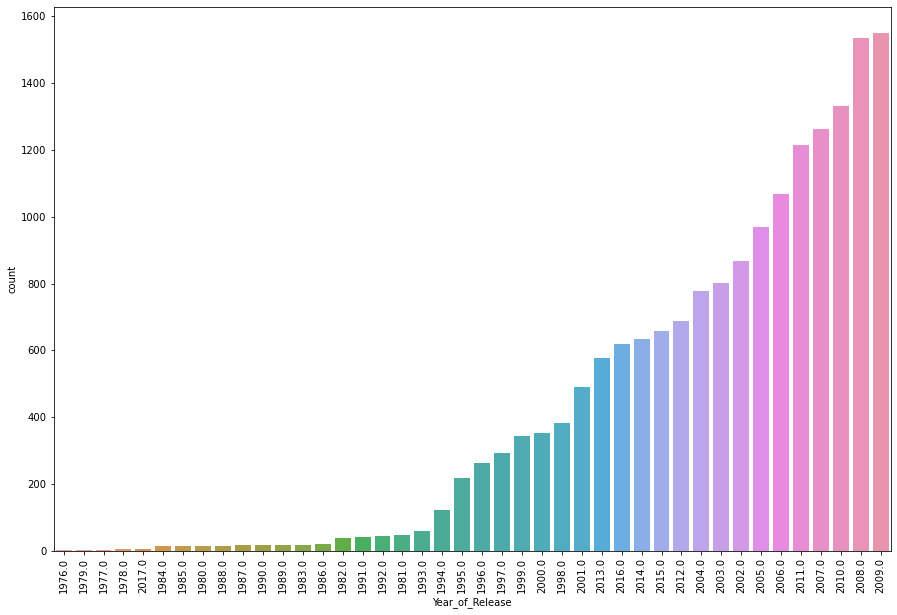

In [76]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year_of_Release", data=score_count_df, order = score_count_df.groupby(by=['Year_of_Release'])['Name'].count().sort_values(ascending=True).index)
plt.xticks(rotation=90)

# Найпопулярніший жанр серед випущених ігор
Кількість ігор з даним жанром 1976-2017

In [77]:
score_count_df['Genre'].value_counts()

Action          3503
Sports          2408
Misc            1813
Role-Playing    1545
Adventure       1478
Shooter         1349
Racing          1282
Simulation       925
Platform         900
Fighting         864
Strategy         734
Puzzle           615
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Shooter'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Simulation'),
  Text(8, 0, 'Platform'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

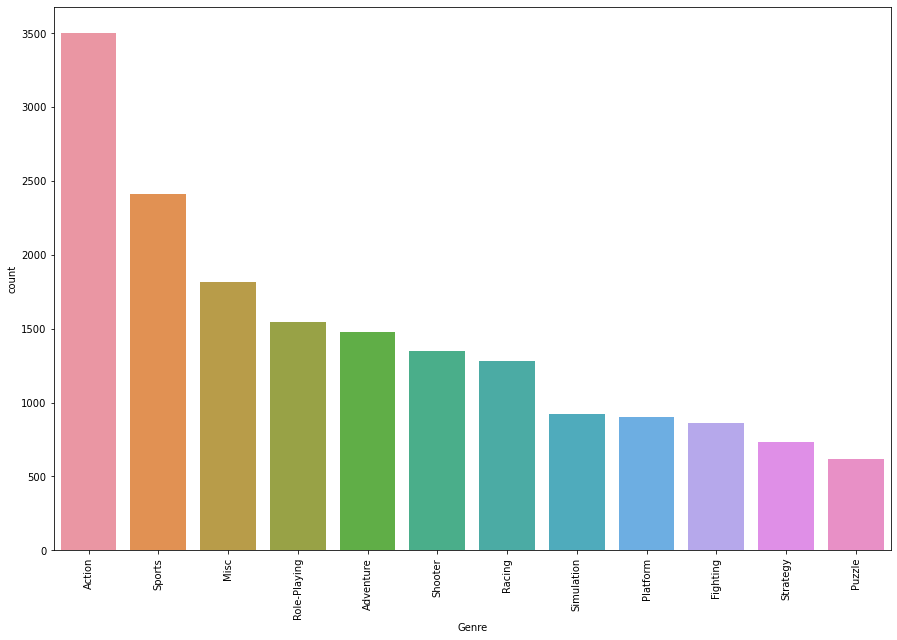

In [78]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=score_count_df, order = score_count_df['Genre'].value_counts().index)
plt.xticks(rotation=90)

# Жанри у топ-5 років по кількості випущених ігор

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

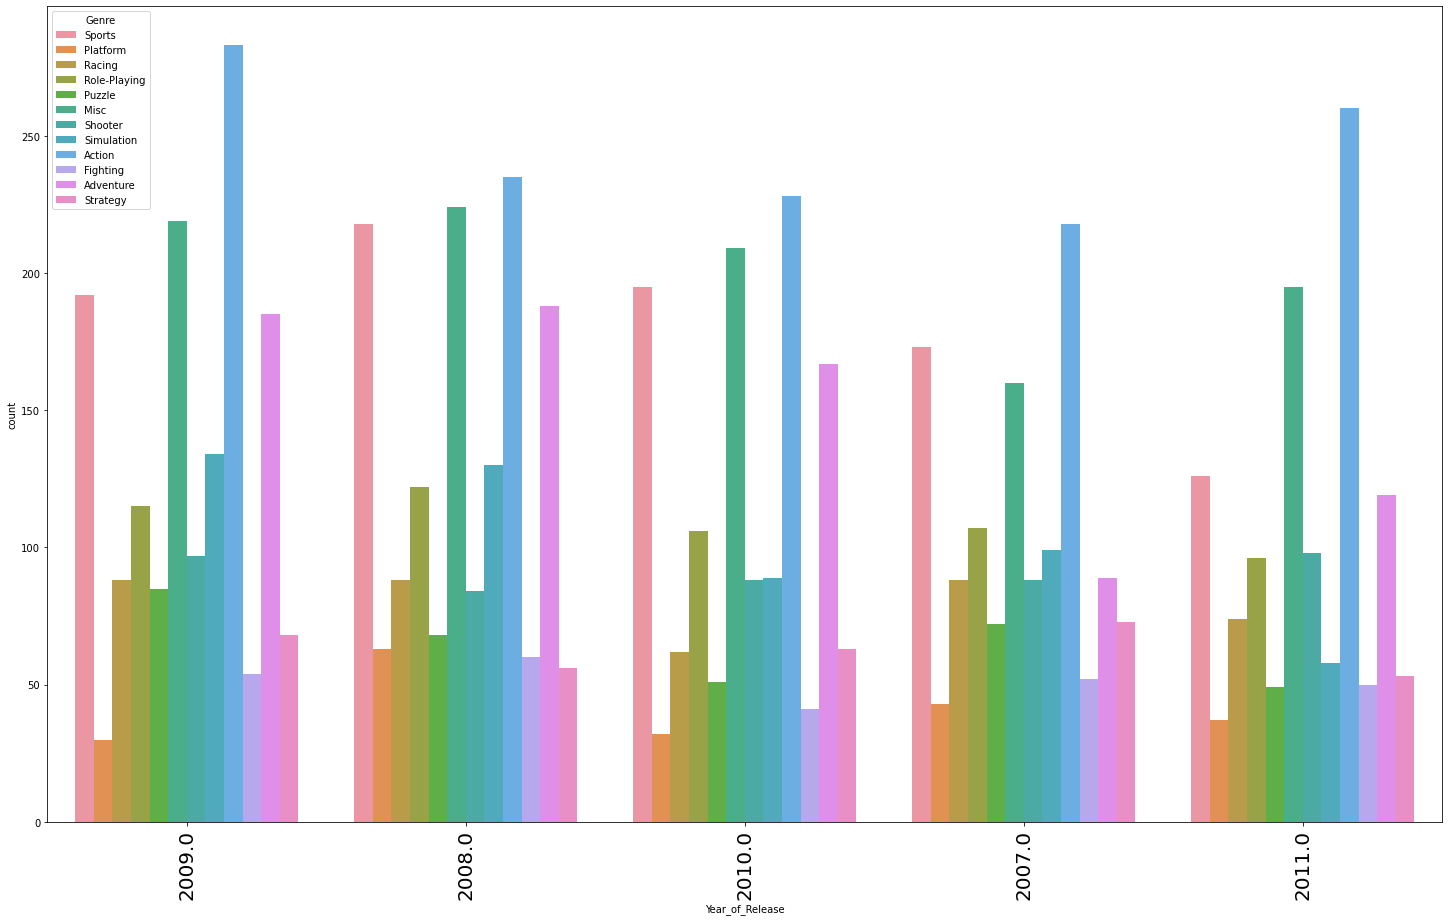

In [79]:
plt.figure(figsize=(25, 15))
sns.countplot(x="Year_of_Release", data=score_count_df, hue='Genre', order=score_count_df.Year_of_Release.value_counts().iloc[:5].index)
plt.xticks(size=20, rotation=90)

# Найпопулярніші жанри по рокам

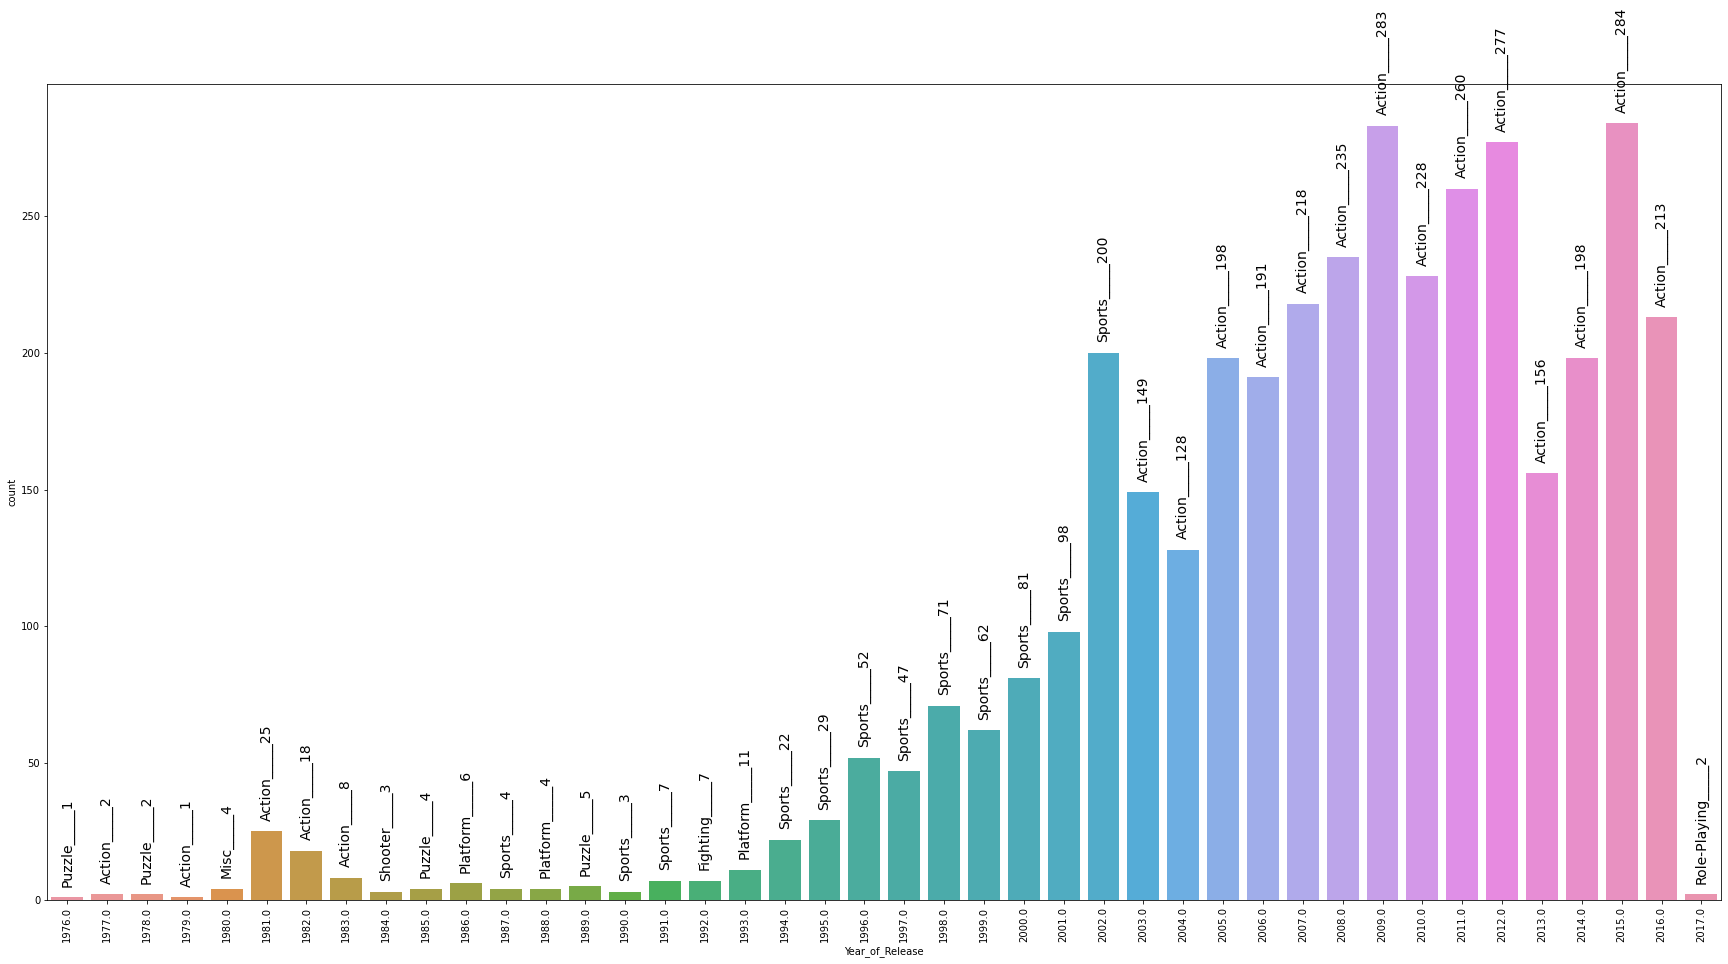

In [80]:
year_max_df = score_count_df.groupby(['Year_of_Release', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year_of_Release'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year_of_Release", "count"], keep='last').reset_index(drop=True)

genre = year_max_genre['Genre'].values

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year_of_Release', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '_____' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

# Жанри ігор з найвищими продажами

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Strategy'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Puzzle'),
  Text(3, 0, 'Simulation'),
  Text(4, 0, 'Fighting'),
  Text(5, 0, 'Racing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Role-Playing'),
  Text(9, 0, 'Shooter'),
  Text(10, 0, 'Sports'),
  Text(11, 0, 'Action')])

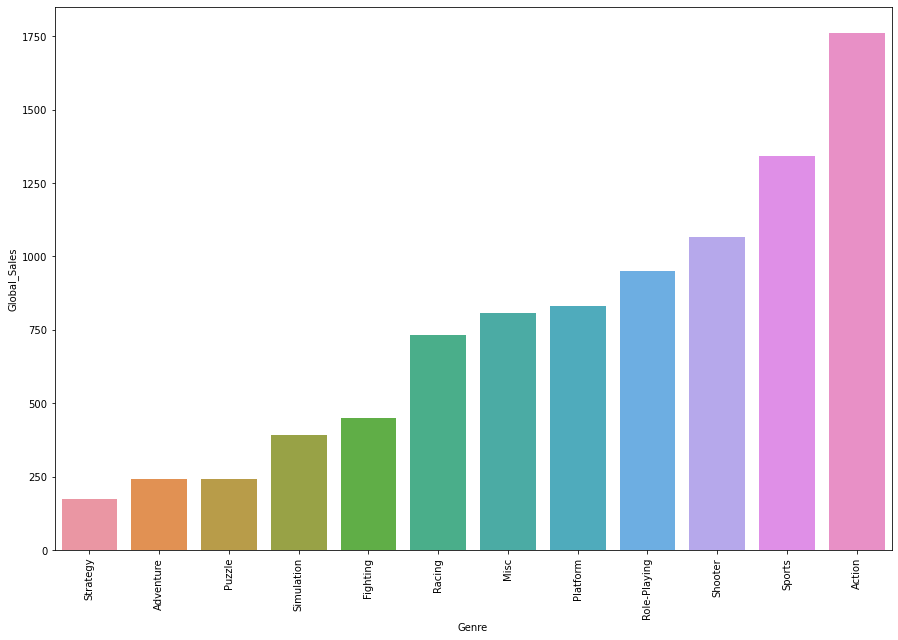

In [81]:
data_genre = score_count_df.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=True)

plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)

In [82]:
warnings_df = pd.read_csv("datasets/vgsales-2.csv")
warnings_df['prefix_r'] = warnings_df['title'].str.slice(0, 12).str.lower()
warnings_df.head(10)

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,prefix_r
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,E,monster jam
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ET,subnautica:
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,M,nier replica
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,ET,jamestown+
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,T,neptunia vir
5,Monster Energy Supercross - The Official Video...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,E,monster ener
6,Monochrome Order,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,T,monochrome o
7,Blightbound,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,T,blightbound
8,Maquette,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ET,maquette
9,FATAL FURY™ BATTLE ARCHIVES VOL.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,T,fatal fury™


In [83]:
percent_missing_func(warnings_df)

,percent_missing
title,0.0
console,0.0
alcohol_reference,0.0
animated_blood,0.0
blood,0.0
blood_and_gore,0.0
cartoon_violence,0.0
crude_humor,0.0
drug_reference,0.0
fantasy_violence,0.0


In [84]:
fact_df = pd.merge(score_count_df, warnings_df, left_on="prefix_l", right_on="prefix_r")
fact_df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,prefix_r
0,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.14,0.98,3.97,21.12,...,0,0,1,0,0,1,0,0,M,grand theft
1,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,...,0,0,1,0,0,1,0,0,M,grand theft
2,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.17,0.06,1.41,16.30,...,0,0,1,0,0,1,0,0,M,grand theft
3,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,...,0,0,1,0,0,1,0,0,M,grand theft
4,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,4.12,6.77,0.39,2.08,13.36,...,0,0,1,0,0,1,0,0,M,grand theft
5,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,...,0,0,1,0,0,1,0,0,M,grand theft
6,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.77,3.07,0.14,1.03,11.01,...,0,0,1,0,0,1,0,0,M,grand theft
7,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.77,3.70,0.44,1.61,10.51,...,0,0,1,0,0,1,0,0,M,grand theft
8,Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,Take-Two Interactive,2.90,2.81,0.24,1.73,7.69,...,0,0,1,0,0,1,0,0,M,grand theft
9,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.93,2.32,0.00,0.49,5.74,...,0,0,1,0,0,1,0,0,M,grand theft


In [85]:
fact_df.shape

(3888, 51)

In [86]:
fact_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating', 'prefix_l',
       'title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating', 'prefix_r'],
      dtype='object')

In [87]:
fact_df = fact_df.drop(columns=['prefix_l', 'prefix_r'])

In [88]:
fact_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,2334.000000,2334.000000,2422.000000,2422.000000,...,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000
mean,2008.000772,0.562371,0.336975,0.168933,0.120262,1.188444,74.336761,31.113111,7.126961,385.264244,...,0.010031,0.047582,0.055813,0.049897,0.125772,0.134002,0.265175,0.022119,0.028807,0.073045
std,6.103536,1.184550,0.778044,0.443382,0.334468,2.254293,12.842768,21.040040,1.542448,944.830317,...,0.099663,0.212908,0.229589,0.217760,0.331634,0.340698,0.441483,0.147091,0.167284,0.260244
min,1978.000000,0.000000,0.000000,0.000000,0.000000,0.010000,19.000000,4.000000,0.200000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.010000,0.010000,0.000000,0.000000,0.120000,67.000000,14.000000,6.400000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,0.140000,0.060000,0.010000,0.020000,0.380000,76.000000,26.000000,7.500000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,0.530000,0.280000,0.130000,0.080000,1.160000,83.000000,44.000000,8.200000,281.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2016.000000,9.730000,9.140000,4.870000,10.570000,21.120000,98.000000,102.000000,9.600000,9142.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


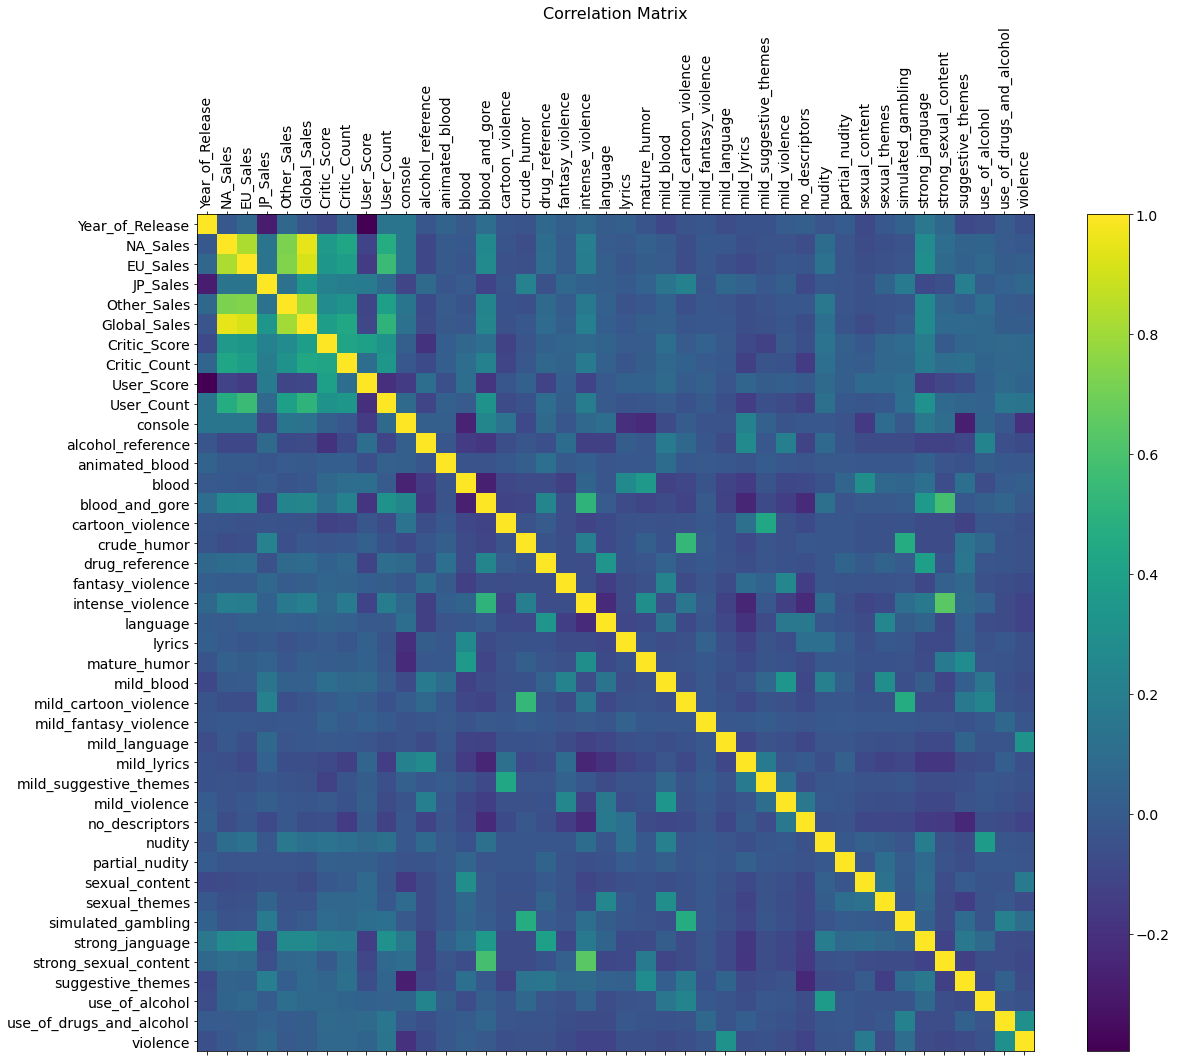

In [89]:
f = plt.figure(figsize=(19, 15))
plt.matshow(fact_df.corr(), fignum=f.number)
plt.xticks(range(fact_df.select_dtypes(['number']).shape[1]), fact_df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(fact_df.select_dtypes(['number']).shape[1]), fact_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [90]:
percent_missing_func(fact_df)

,percent_missing
Name,0.000000
Platform,0.000000
Year_of_Release,0.000000
Genre,0.000000
Publisher,0.000000
NA_Sales,0.000000
EU_Sales,0.000000
JP_Sales,0.000000
Other_Sales,0.000000
Global_Sales,0.000000


In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(fact_df[['Platform']]).toarray())
# merge with main df bridge_df on key values
f_df = fact_df.join(enc_df)
f_df = f_df.drop(columns=["Platform", "Rating"])
f = f_df.fillna(0)

f['Genre'] = LabelEncoder().fit_transform(f['Genre'])
f['Publisher'] = LabelEncoder().fit_transform(f['Publisher'])
f['esrb_rating'] = LabelEncoder().fit_transform(f['esrb_rating'].astype('str'))

In [92]:
from sklearn.preprocessing import StandardScaler

y=f["Genre"].values

X = f.drop(columns=["Genre", "Name", "title"])
X = StandardScaler().fit_transform(X)

/usr/local/anaconda3/envs/VideoGamesAnalysis2/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/anaconda3/envs/VideoGamesAnalysis2/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [93]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [94]:
y_train

array([8, 2, 8, ..., 0, 8, 4])

In [95]:
#shape of train and test objects
print (X_train. shape)
print (X_test.shape)

(3110, 70)
(778, 70)


In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors=3)
knn.fit(X_train,y_train)

print(knn.score(X_test,y_test))

0.7069408740359897


In [97]:
from sklearn.neighbors import KNeighborsClassifier
#import metrics model to check the accuracy
from sklearn import metrics

#Try running from R=1 through 25 and record testing accuracy
k_range = range (1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [98]:
f["Genre"].unique()

array([ 0,  1,  8,  7,  9,  3,  4, 11,  6,  2, 10,  5])

In [99]:
scores_list

[0.7622107969151671,
 0.7095115681233933,
 0.7069408740359897,
 0.6838046272493573,
 0.7030848329048843,
 0.6786632390745502,
 0.6773778920308483,
 0.6670951156812339,
 0.6658097686375322,
 0.6658097686375322,
 0.6555269922879178,
 0.6491002570694088,
 0.6465295629820051,
 0.6439588688946015,
 0.6388174807197944,
 0.6555269922879178,
 0.6529562982005142,
 0.6491002570694088,
 0.6426735218508998,
 0.6413881748071979,
 0.6413881748071979,
 0.6413881748071979,
 0.6349614395886889,
 0.6323907455012854,
 0.6349614395886889]

In [100]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
clf.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
accuracy

0.8740359897172236

In [103]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]
linearly_separable = (X, y)

datasets = [
    linearly_separable,
]
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f"{name} - {score}")

        i += 1

Nearest Neighbors - 0.7075835475578406
Linear SVM - 0.7506426735218509
RBF SVM - 0.4588688946015424


KeyboardInterrupt: 